# Working with Spatial Data; Network Analysis

In [123]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from mpl_toolkits.basemap import Basemap

import matplotlib
from matplotlib.colors import rgb2hex
from matplotlib.patches import Polygon

import networkx as nx
from networkx.algorithms import community

## Geospatial Data

* Data that has a geographic component to it
    * Most commonly: coordinates (latitude, longitude)
    * Sometimes: country, city, ZIP code, address
    * Not necessarily on Earth (Google Mars)
* Sources
    * Satellite images
    * GPS data
    * Geotagging (e.g., photos at Facebook)
    * Manual entry, etc.
* Working with spatial data isn't trivial…
    * E.g., we need geometry on a sphere to calculate distances
    * … but we have libraries that make our lives easier

In [3]:
earthquakes = pd.read_csv("data/earthquakes.csv")

In [4]:
earthquakes

,Date,Time,Latitude,Longitude,Type,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Type,...,Magnitude Seismic Stations,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status
0,01/02/1965,13:44:18,19.2460,145.6160,Earthquake,131.60,NaN,NaN,6.0,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860706,ISCGEM,ISCGEM,ISCGEM,Automatic
1,01/04/1965,11:29:49,1.8630,127.3520,Earthquake,80.00,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860737,ISCGEM,ISCGEM,ISCGEM,Automatic
2,01/05/1965,18:05:58,-20.5790,-173.9720,Earthquake,20.00,NaN,NaN,6.2,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860762,ISCGEM,ISCGEM,ISCGEM,Automatic
3,01/08/1965,18:49:43,-59.0760,-23.5570,Earthquake,15.00,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860856,ISCGEM,ISCGEM,ISCGEM,Automatic
4,01/09/1965,13:32:50,11.9380,126.4270,Earthquake,15.00,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860890,ISCGEM,ISCGEM,ISCGEM,Automatic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23407,12/28/2016,08:22:12,38.3917,-118.8941,Earthquake,12.30,1.2,40.0,5.6,ML,...,18.0,42.47,0.120,NaN,0.1898,NN00570710,NN,NN,NN,Reviewed
23408,12/28/2016,09:13:47,38.3777,-118.8957,Earthquake,8.80,2.0,33.0,5.5,ML,...,18.0,48.58,0.129,NaN,0.2187,NN00570744,NN,NN,NN,Reviewed
23409,12/28/2016,12:38:51,36.9179,140.4262,Earthquake,10.00,1.8,NaN,5.9,MWW,...,NaN,91.00,0.992,4.8,1.5200,US10007NAF,US,US,US,Reviewed
23410,12/29/2016,22:30:19,-9.0283,118.6639,Earthquake,79.00,1.8,NaN,6.3,MWW,...,NaN,26.00,3.553,6.0,1.4300,US10007NL0,US,US,US,Reviewed


In [5]:
earthquakes.shape

(23412, 21)

In [7]:
earthquakes.dtypes

Date                           object
Time                           object
Latitude                      float64
Longitude                     float64
Type                           object
Depth                         float64
Depth Error                   float64
Depth Seismic Stations        float64
Magnitude                     float64
Magnitude Type                 object
Magnitude Error               float64
Magnitude Seismic Stations    float64
Azimuthal Gap                 float64
Horizontal Distance           float64
Horizontal Error              float64
Root Mean Square              float64
ID                             object
Source                         object
Location Source                object
Magnitude Source               object
Status                         object
dtype: object

In [8]:
earthquakes.Date.str.len().value_counts() # имаме сгрешени данни

10    23409
24        3
Name: Date, dtype: int64

In [18]:
earthquakes[earthquakes.Date.str.len() == 24]

,Date,Time,Latitude,Longitude,Type,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Type,...,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status,DateTime
3378,1975-02-23T02:58:41.000Z,1975-02-23T02:58:41.000Z,8.017,124.075,Earthquake,623.0,NaN,NaN,5.6,MB,...,NaN,NaN,NaN,NaN,USP0000A09,US,US,US,Reviewed,NaT
7512,1985-04-28T02:53:41.530Z,1985-04-28T02:53:41.530Z,-32.998,-71.766,Earthquake,33.0,NaN,NaN,5.6,MW,...,NaN,NaN,NaN,1.30,USP0002E81,US,US,HRV,Reviewed,NaT
20650,2011-03-13T02:23:34.520Z,2011-03-13T02:23:34.520Z,36.344,142.344,Earthquake,10.1,13.9,289.0,5.8,MWC,...,32.3,NaN,NaN,1.06,USP000HWQP,US,US,GCMT,Reviewed,NaT


In [13]:
earthquakes["DateTime"] # оставя Nat където не е попълнено

0       NaT
1       NaT
2       NaT
3       NaT
4       NaT
         ..
23407   NaT
23408   NaT
23409   NaT
23410   NaT
23411   NaT
Name: DateTime, Length: 23412, dtype: datetime64[ns, UTC]

In [15]:
usual_date_formats = earthquakes.Date.str.len() != 24
earthquakes["DateTime"] = pd.to_datetime(earthquakes[usual_date_formats].Date + " " + earthquakes[usual_date_formats].Time)
# оставя Nat където не е попълнено

In [16]:
null_inxixes = earthquakes[earthquakes.DateTime.isna()].index

In [19]:
earthquakes.loc[null_inxixes, "DateTime"] = pd.to_datetime(earthquakes[earthquakes.Date.str.len() == 24].Date)

In [21]:
earthquakes.DateTime.isna().any()

False

In [22]:
earthquakes = earthquakes.drop(columns = ["Date", "Time"])

In [23]:
earthquakes.Status.value_counts()

Reviewed     20773
Automatic     2639
Name: Status, dtype: int64

In [24]:
earthquakes.ID.nunique == len(earthquakes)

False

In [25]:
earthquakes.Type.value_counts()

Earthquake           23232
Nuclear Explosion      175
Explosion                4
Rock Burst               1
Name: Type, dtype: int64

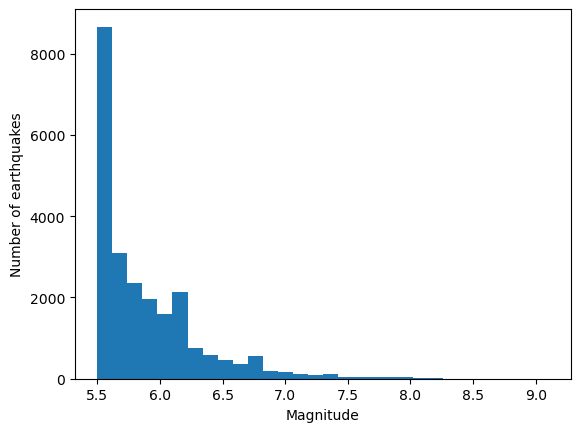

In [28]:
plt.hist(earthquakes.Magnitude, bins = 30)
plt.xlabel("Magnitude")
plt.ylabel("Number of earthquakes")
plt.show()

In [31]:
earthquakes.nlargest(5, "Magnitude")

,Latitude,Longitude,Type,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Type,Magnitude Error,Magnitude Seismic Stations,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status,DateTime
17083,3.295,95.982,Earthquake,30.0,NaN,601.0,9.1,MW,NaN,NaN,22.0,NaN,NaN,1.17,OFFICIAL20041226005853450_30,OFFICIAL,US,OFFICIAL,Reviewed,2004-12-26 00:58:53
20501,38.297,142.373,Earthquake,29.0,NaN,541.0,9.1,MWW,NaN,NaN,9.5,NaN,NaN,1.16,OFFICIAL20110311054624120_30,OFFICIAL,US,OFFICIAL,Reviewed,2011-03-11 05:46:24
19928,-36.122,-72.898,Earthquake,22.9,9.2,454.0,8.8,MWW,NaN,NaN,17.8,NaN,NaN,1.09,OFFICIAL20100227063411530_30,OFFICIAL,US,OFFICIAL,Reviewed,2010-02-27 06:34:12
16,51.251,178.715,Earthquake,30.3,NaN,NaN,8.7,MW,NaN,NaN,NaN,NaN,NaN,NaN,OFFICIAL19650204050122_30,OFFICIAL,ISCGEM,OFFICIAL,Automatic,1965-02-04 05:01:22
17329,2.085,97.108,Earthquake,30.0,NaN,510.0,8.6,MWW,NaN,NaN,22.1,NaN,NaN,0.91,OFFICIAL20050328160936530_30,OFFICIAL,US,OFFICIAL,Reviewed,2005-03-28 16:09:37


In [33]:
earthquakes[earthquakes.Magnitude >= 8].shape

(40, 20)

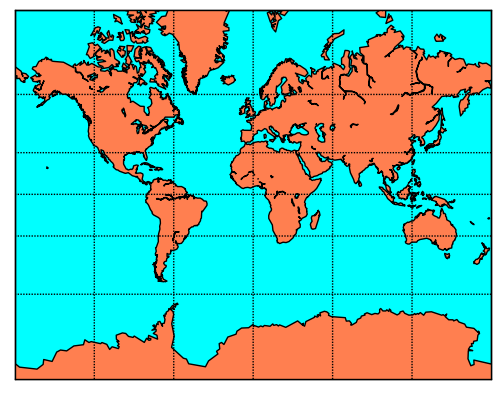

In [35]:
m = Basemap(projection = "merc", llcrnrlat = -80, urcrnrlat = 80, llcrnrlon = -180, urcrnrlon = 180)

#запълваме континентите
m.drawcoastlines()
m.fillcontinents(color = "coral", lake_color = "aqua")

# чертаем паралели и меридиани
m.drawparallels(np.arange(-90, 91, 30))
m.drawmeridians(np.arange(-180, 181, 60))

#запълваме с вода
m.drawmapboundary(fill_color = "aqua")

plt.show()

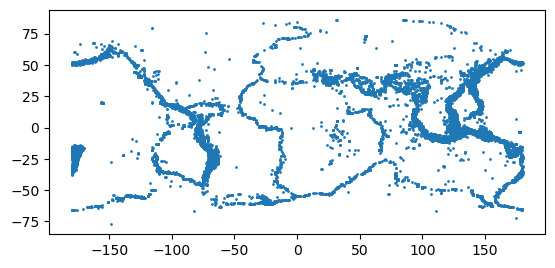

In [37]:
plt.scatter(earthquakes.Longitude, earthquakes.Latitude, s = 1) # ПО Х ВИНАГИ Е LONGITUDE, ПО Y LATITUDE

plt.gca().set_aspect("equal")

plt.show()

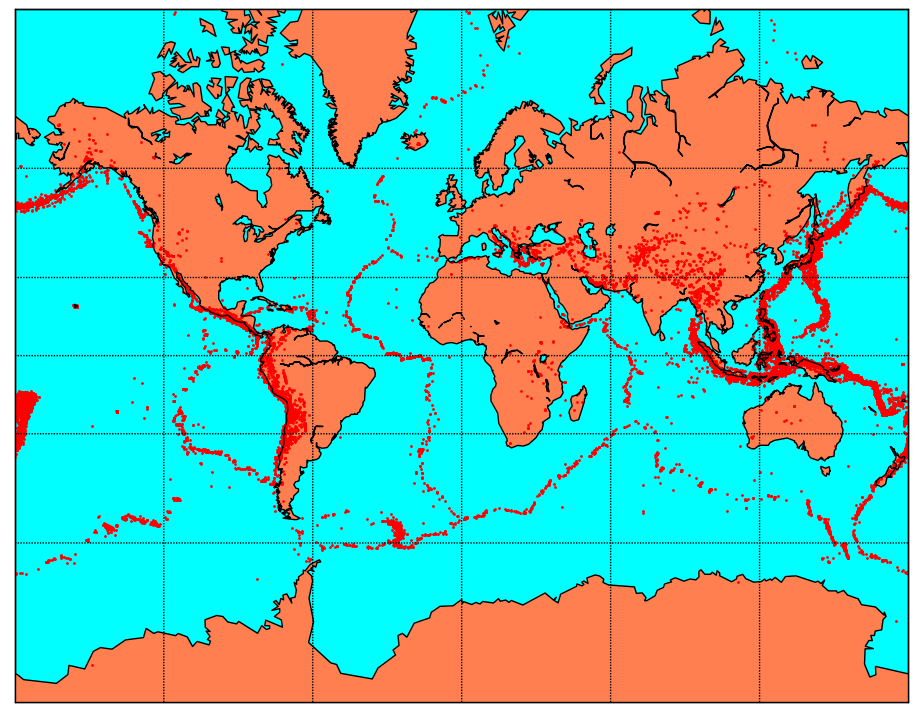

In [42]:
plt.figure(figsize = (18, 9))
m = Basemap(projection = "merc", llcrnrlat = -80, urcrnrlat = 80, llcrnrlon = -180, urcrnrlon = 180)

m.drawcoastlines()
m.fillcontinents(color = "coral", lake_color = "aqua")
m.drawparallels(np.arange(-90, 91, 30))
m.drawmeridians(np.arange(-180, 181, 60))
m.drawmapboundary(fill_color = "aqua")

earthquakes_x, earthquakes_y = m(earthquakes.Longitude, earthquakes.Latitude)

plt.scatter(earthquakes_x, earthquakes_y, s = 1, color = "r")

plt.show()

In [44]:
strongest_earthquakes = earthquakes[earthquakes.Magnitude >= 8]
strongest_earthquakes_x, strongest_earthquakes_y = m(strongest_earthquakes.Longitude, strongest_earthquakes.Latitude)

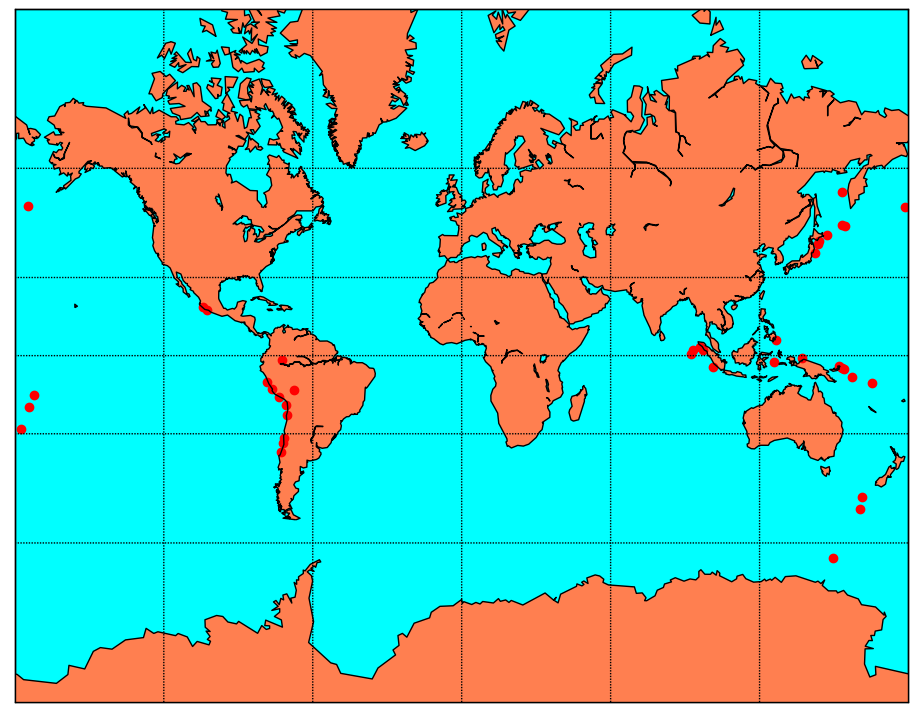

In [47]:
plt.figure(figsize = (18, 9))
m = Basemap(projection = "merc", llcrnrlat = -80, urcrnrlat = 80, llcrnrlon = -180, urcrnrlon = 180)

m.drawcoastlines()
m.fillcontinents(color = "coral", lake_color = "aqua")
m.drawparallels(np.arange(-90, 91, 30))
m.drawmeridians(np.arange(-180, 181, 60))
m.drawmapboundary(fill_color = "aqua")

plt.scatter(strongest_earthquakes_x, strongest_earthquakes_y, color = "r")

plt.show()

In [50]:
volcanos = pd.read_csv("data/volcanos.csv")
volcanos.shape

(1508, 12)

In [49]:
volcanos

,Number,Name,Country,Region,Type,Activity Evidence,Last Known Eruption,Latitude,Longitude,Elevation (Meters),Dominant Rock Type,Tectonic Setting
0,210010,West Eifel Volcanic Field,Germany,Mediterranean and Western Asia,Maar(s),Eruption Dated,8300 BCE,50.170,6.850,600,Foidite,Rift Zone / Continental Crust (>25 km)
1,210020,Chaine des Puys,France,Mediterranean and Western Asia,Lava dome(s),Eruption Dated,4040 BCE,45.775,2.970,1464,Basalt / Picro-Basalt,Rift Zone / Continental Crust (>25 km)
2,210030,Olot Volcanic Field,Spain,Mediterranean and Western Asia,Pyroclastic cone(s),Evidence Credible,Unknown,42.170,2.530,893,Trachybasalt / Tephrite Basanite,Intraplate / Continental Crust (>25 km)
3,210040,Calatrava Volcanic Field,Spain,Mediterranean and Western Asia,Pyroclastic cone(s),Eruption Dated,3600 BCE,38.870,-4.020,1117,Basalt / Picro-Basalt,Intraplate / Continental Crust (>25 km)
4,211001,Larderello,Italy,Mediterranean and Western Asia,Explosion crater(s),Eruption Observed,1282 CE,43.250,10.870,500,No Data,Subduction Zone / Continental Crust (>25 km)
...,...,...,...,...,...,...,...,...,...,...,...,...
1503,390130,Zavodovski,United Kingdom,Antarctica,Stratovolcano,Eruption Observed,2016 CE,-56.300,-27.570,551,Basalt / Picro-Basalt,Subduction Zone / Oceanic Crust (< 15 km)
1504,390140,Protector Seamounts,United Kingdom,Antarctica,Submarine,Eruption Observed,1962 CE,-55.912,-28.167,-55,Rhyolite,Subduction Zone / Oceanic Crust (< 15 km)
1505,390812,"Rittmann, Mount",Antarctica,Antarctica,Shield,Unrest / Pleistocene,Unknown,-73.450,165.500,2600,NaN,Intraplate / Continental Crust (>25 km)
1506,390829,James Ross Island,Antarctica,Antarctica,Shield,Evidence Credible,Unknown,-64.150,-57.750,1630,Basalt / Picro-Basalt,Intraplate / Continental Crust (>25 km)


In [51]:
volcanos_x, volcanos_y = m(volcanos.Longitude, volcanos.Latitude)

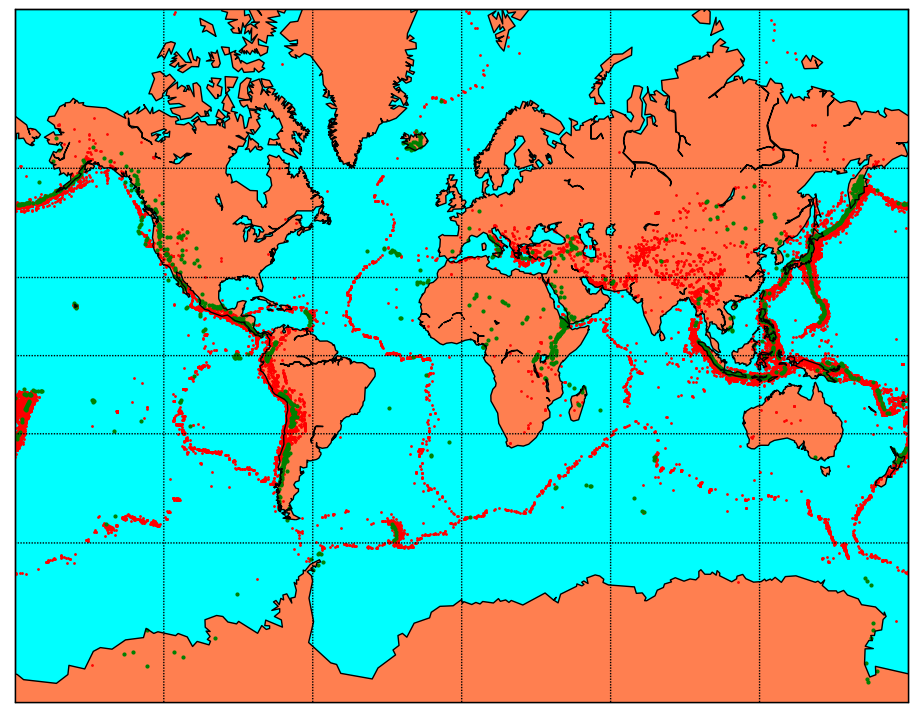

In [57]:
plt.figure(figsize = (18, 9))
m = Basemap(projection = "merc", llcrnrlat = -80, urcrnrlat = 80, llcrnrlon = -180, urcrnrlon = 180)

m.drawcoastlines()
m.fillcontinents(color = "coral", lake_color = "aqua")
m.drawparallels(np.arange(-90, 91, 30))
m.drawmeridians(np.arange(-180, 181, 60))
m.drawmapboundary(fill_color = "aqua")

plt.scatter(earthquakes_x, earthquakes_y, s = 1, color = "r")
plt.scatter(volcanos_x, volcanos_y, s = 4, color = "g")

plt.show()

## Drawing a Choropleth Map

* Like a heatmap
    * Shows different countries (or US states) in different colorsaccording to a scale

In [59]:
ufos = pd.read_csv("data/ufo_sightings_scrubbed.csv")

C:\Users\stoic\AppData\Local\Temp\ipykernel_14720\4066352051.py:1: DtypeWarning: Columns (5,9) have mixed types. Specify dtype option on import or set low_memory=False.
  ufos = pd.read_csv("data/ufo_sightings_scrubbed.csv")


In [60]:
ufos

,datetime,city,state,country,shape,duration (seconds),duration (hours/min),comments,date posted,latitude,longitude
0,10/10/1949 20:30,san marcos,tx,us,cylinder,2700,45 minutes,This event took place in early fall around 194...,4/27/2004,29.8830556,-97.941111
1,10/10/1949 21:00,lackland afb,tx,NaN,light,7200,1-2 hrs,1949 Lackland AFB&#44 TX. Lights racing acros...,12/16/2005,29.38421,-98.581082
2,10/10/1955 17:00,chester (uk/england),NaN,gb,circle,20,20 seconds,Green/Orange circular disc over Chester&#44 En...,1/21/2008,53.2,-2.916667
3,10/10/1956 21:00,edna,tx,us,circle,20,1/2 hour,My older brother and twin sister were leaving ...,1/17/2004,28.9783333,-96.645833
4,10/10/1960 20:00,kaneohe,hi,us,light,900,15 minutes,AS a Marine 1st Lt. flying an FJ4B fighter/att...,1/22/2004,21.4180556,-157.803611
...,...,...,...,...,...,...,...,...,...,...,...
80327,9/9/2013 21:15,nashville,tn,us,light,600.0,10 minutes,Round from the distance/slowly changing colors...,9/30/2013,36.165833,-86.784444
80328,9/9/2013 22:00,boise,id,us,circle,1200.0,20 minutes,Boise&#44 ID&#44 spherical&#44 20 min&#44 10 r...,9/30/2013,43.613611,-116.202500
80329,9/9/2013 22:00,napa,ca,us,other,1200.0,hour,Napa UFO&#44,9/30/2013,38.297222,-122.284444
80330,9/9/2013 22:20,vienna,va,us,circle,5.0,5 seconds,Saw a five gold lit cicular craft moving fastl...,9/30/2013,38.901111,-77.265556


In [61]:
ufos = ufos.rename(columns = {"longitude ": "longitude"})

In [63]:
ufos.dtypes

datetime                 object
city                     object
state                    object
country                  object
shape                    object
duration (seconds)       object
duration (hours/min)     object
comments                 object
date posted              object
latitude                 object
longitude               float64
dtype: object

In [75]:
ufos.latitude = ufos.latitude.replace({
    "33q.200088" : 33.200088
})

In [76]:
ufos["latitude"] = ufos.latitude.astype(float, errors ="ignore")

In [77]:
ufos_x, ufos_y = m(ufos.longitude, ufos.latitude)

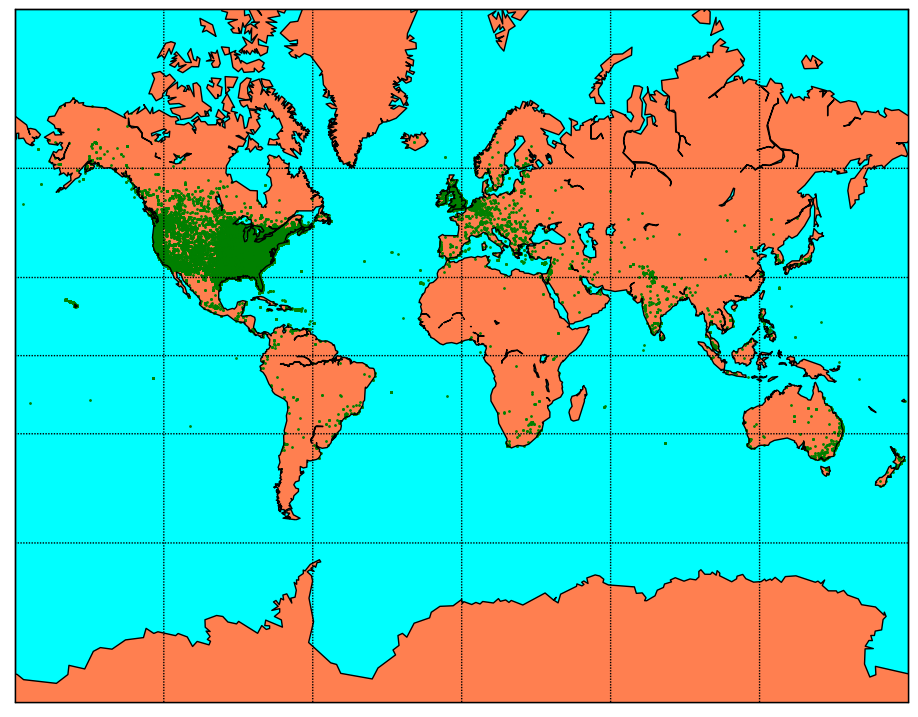

In [79]:
plt.figure(figsize = (18, 9))
m = Basemap(projection = "merc", llcrnrlat = -80, urcrnrlat = 80, llcrnrlon = -180, urcrnrlon = 180)

m.drawcoastlines()
m.fillcontinents(color = "coral", lake_color = "aqua")
m.drawparallels(np.arange(-90, 91, 30))
m.drawmeridians(np.arange(-180, 181, 60))
m.drawmapboundary(fill_color = "aqua")

plt.scatter(ufos_x, ufos_y, s = 1, color = "g")

plt.show()

In [80]:
ufos = ufos[ufos.country == "us"]

In [81]:
states = pd.read_csv("data/states.csv")

In [82]:
states

,abbreviation,name
0,AK,Alaska
1,AL,Alabama
2,AR,Arkansas
3,AS,American Samoa
4,AZ,Arizona
5,CA,California
6,CO,Colorado
7,CT,Connecticut
8,DC,District of Columbia
9,DE,Delaware


In [83]:
states["state_lower"] = states.abbreviation.str.lower()

In [85]:
ufos = ufos.merge(states, left_on = "state", right_on = "state_lower")

In [90]:
ufos.state = ufos["name"]

In [91]:
ufos

,datetime,city,state,country,shape,duration (seconds),duration (hours/min),comments,date posted,latitude,longitude,abbreviation,name,state_lower
0,10/10/1949 20:30,san marcos,Texas,us,cylinder,2700,45 minutes,This event took place in early fall around 194...,4/27/2004,29.883056,-97.941111,TX,Texas,tx
1,10/10/1956 21:00,edna,Texas,us,circle,20,1/2 hour,My older brother and twin sister were leaving ...,1/17/2004,28.978333,-96.645833,TX,Texas,tx
2,10/10/1977 12:00,san antonio,Texas,us,other,30,30 seconds,i was about six or seven and my family and me ...,2/24/2005,29.423889,-98.493333,TX,Texas,tx
3,10/10/1980 19:00,houston,Texas,us,sphere,180,3 min,Sphere&#44 No lights&#44 moving through neigh...,4/16/2005,29.763056,-95.363056,TX,Texas,tx
4,10/10/1980 22:00,dallas,Texas,us,unknown,300,5 minutes,Strange shape shifting craft of pure light ene...,10/28/2002,32.783333,-96.800000,TX,Texas,tx
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65109,6/15/2011 20:19,georgetown,District of Columbia,us,disk,6,6 seconds,metallic disk hovering silent in crowded airsp...,6/20/2011,38.904722,-77.062778,DC,District of Columbia,dc
65110,7/25/2012 21:30,washington,District of Columbia,us,changing,900,10-15 minutes,3 objects in 15 minutes&#44 2 balls of light m...,8/19/2012,38.895000,-77.036667,DC,District of Columbia,dc
65111,7/4/2012 21:06,washington,District of Columbia,us,sphere,5.5,5.5 seconds,Luminous spheres in flight&#44 then suddenly v...,8/5/2012,38.895000,-77.036667,DC,District of Columbia,dc
65112,8/28/2010 22:06,washington,District of Columbia,us,fireball,120.0,2 minutes,Red flaming object flying low over Washington ...,8/30/2010,38.895000,-77.036667,DC,District of Columbia,dc


In [92]:
num_sightings_by_state = ufos.value_counts("state")

In [93]:
num_sightings_by_state

state
California              8912
Washington              3966
Florida                 3835
Texas                   3447
New York                2980
Illinois                2499
Arizona                 2414
Pennsylvania            2366
Ohio                    2275
Michigan                1836
Oregon                  1747
North Carolina          1740
Missouri                1458
Colorado                1413
Indiana                 1288
Virginia                1273
Massachusetts           1256
New Jersey              1255
Georgia                 1255
Wisconsin               1232
Tennessee               1119
Minnesota               1012
South Carolina          1003
Connecticut              892
Kentucky                 855
Maryland                 837
Nevada                   803
Oklahoma                 724
New Mexico               720
Iowa                     678
Alabama                  642
Utah                     622
Kansas                   613
Arkansas                 588
Louisian

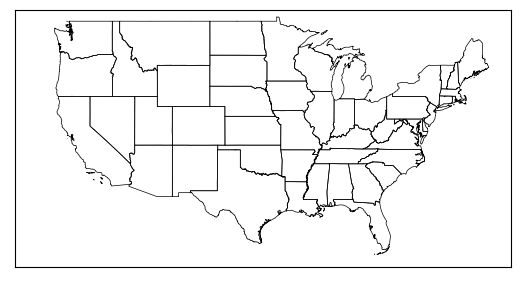

In [95]:
m = Basemap(projection = "merc", llcrnrlon = -130, llcrnrlat = 23, urcrnrlon = -64, urcrnrlat = 50)
us_info = m.readshapefile("data/st99_d00", "states", drawbounds = True)

In [96]:
us_info

(273,
 5,
 [-179.14734, 17.884813, 0.0, 0.0],
 [179.77847, 71.35256064399981, 0.0, 0.0],
 <matplotlib.collections.LineCollection at 0x1fafa46af10>)

In [97]:
m.states_info

[{'AREA': 271.254383622068,
  'PERIMETER': 227.171421517178,
  'ST99_D00_': 2,
  'ST99_D00_I': 1,
  'STATE': '02',
  'NAME': 'Alaska',
  'LSAD': '01',
  'REGION': '4',
  'DIVISION': '9',
  'LSAD_TRANS': '',
  'RINGNUM': 1,
  'SHAPENUM': 1},
 {'AREA': 0.00374851298849799,
  'PERIMETER': 0.349840468459525,
  'ST99_D00_': 3,
  'ST99_D00_I': 2,
  'STATE': '02',
  'NAME': 'Alaska',
  'LSAD': '01',
  'REGION': '4',
  'DIVISION': '9',
  'LSAD_TRANS': '',
  'RINGNUM': 1,
  'SHAPENUM': 2},
 {'AREA': 0.00149949982799957,
  'PERIMETER': 0.153532820266569,
  'ST99_D00_': 4,
  'ST99_D00_I': 3,
  'STATE': '02',
  'NAME': 'Alaska',
  'LSAD': '01',
  'REGION': '4',
  'DIVISION': '9',
  'LSAD_TRANS': '',
  'RINGNUM': 1,
  'SHAPENUM': 3},
 {'AREA': 0.0313000839335011,
  'PERIMETER': 0.71222623089465,
  'ST99_D00_': 5,
  'ST99_D00_I': 4,
  'STATE': '02',
  'NAME': 'Alaska',
  'LSAD': '01',
  'REGION': '4',
  'DIVISION': '9',
  'LSAD_TRANS': '',
  'RINGNUM': 1,
  'SHAPENUM': 4},
 {'AREA': 0.88933881264201

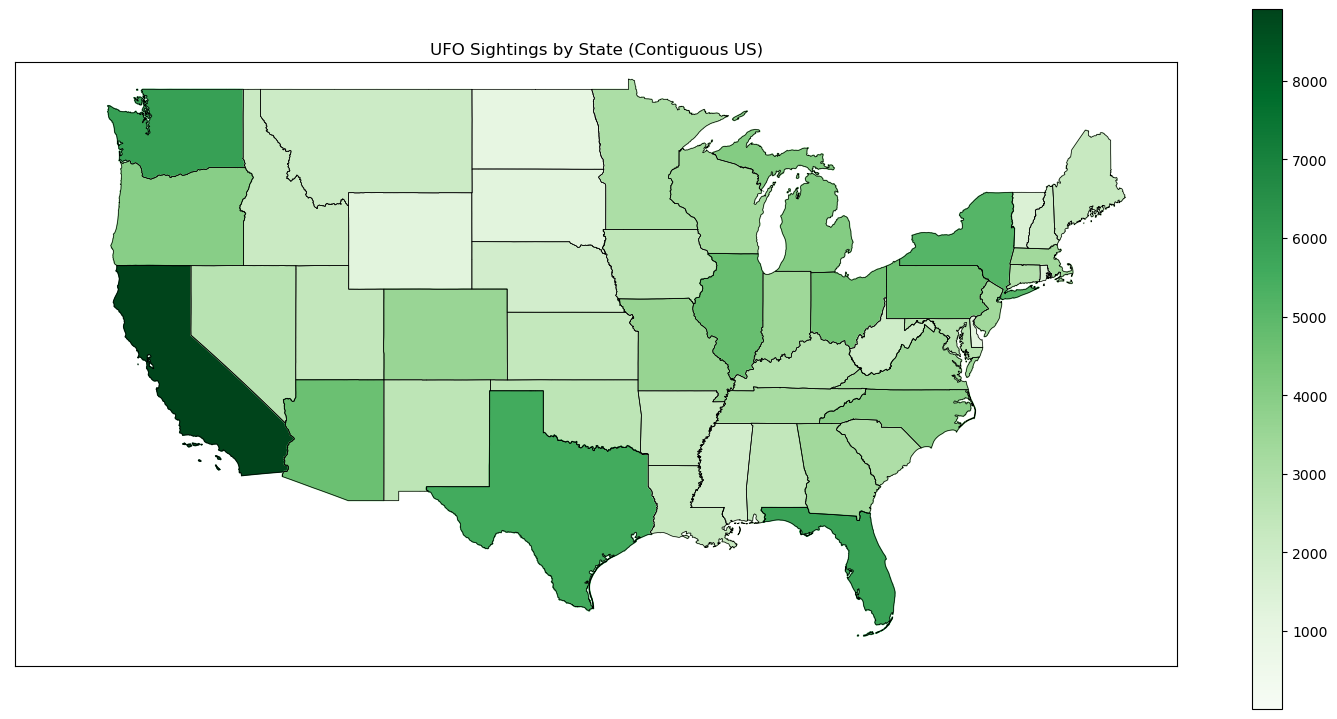

In [106]:
fig = plt.figure(figsize = (15, 10))
m = Basemap(projection = "merc", llcrnrlon = -130, llcrnrlat = 23, urcrnrlon = -64, urcrnrlat = 50)
us_info = m.readshapefile("data/st99_d00", "states", drawbounds = True)
colors = {}
state_names = []
cmap = plt.cm.Greens
vmin = num_sightings_by_state.min()
vmax = num_sightings_by_state.max()

# Compute colors for each state
# np.sqrt() spreads the colors more evenly
# (sightings – vmin) / (vmax – vmin) returns a normalized value from 0 to 1
# cmap() returns RGBA values, [:3] discards the alpha channel

for shape_dict in m.states_info:
    state_name = shape_dict["NAME"]
  # Skip DC and Puerto Rico
    if state_name not in ["District of Columbia", "Puerto Rico"]:
        sightings = num_sightings_by_state[num_sightings_by_state.index == state_name][0]
        colors[state_name] = cmap(np.sqrt((sightings - vmin) / (vmax - vmin)))[:3]
    state_names.append(state_name)
    
#Draw the polygons for each state
ax = plt.gca()
for nshape, seg in enumerate(m.states):
  # Skip DC and Puerto Rico
  if state_names[nshape] not in ["District of Columbia", "Puerto Rico"]:
    color = rgb2hex(colors[state_names[nshape]])
    poly = Polygon(seg, facecolor = color, edgecolor = color)
    ax.add_patch(poly)
    
#Add title and color bar
plt.title("UFO Sightings by State (Contiguous US)")
colorbar_ax = fig.add_axes([0.95, 0.15, 0.02, 0.7])
matplotlib.colorbar.ColorbarBase(colorbar_ax, cmap = cmap,
  norm = matplotlib.colors.Normalize(vmin, vmax))
plt.show()

Another library for maps is **GeoPandas**.

## Analyzing Maps
* There are many algorithms used to model spatial data
    * Most commonly, we look for density patternsand clusters of points
    * Common algorithms are
        * KDE – Kernel Density Estimation
        * kMeans Clustering
        * Hierarchical Clustering
        * kNN – k Nearest Neighbors
    * This course doesn't deal with modelling, so we won't getinto more detail
        * But feel free to explore the algorithms as you wish
        * You can see details on these on machine learning-related articles
* We can also represent the map as a network
    * E.g. road maps, railway maps, or other "sets of connected dots"

## Network Analysis

Networks = Graphs

* A graph is a geometrical object consisting of objects which are related by some attribute
    * **Nodes** (vertices, points) – describe objects
    * **Edges** (arcs, lines) – connect nodes
* Types of graphs
    * **Directed / undirected**
        * In a directed graph, thereis only one way to travelbetween the nodes
    * **Weighted / unweighted**
        * A weighted graph contains some quantity ("weight", usually ≥0) over each of its edges
        
* Types of graphs (cont'd)
    * **Cyclic / acyclic**
        * When you travel along a cyclic graph,you will visit one node more than once
    * These types are independent
        * i.e. a graph can be “acyclic directed unweighted graph”
* Special cases
    * **Tree** – each node has at most one "parent"
    * **DAG** – directed acyclic graph

In [108]:
g = nx.Graph()

In [109]:
g.add_edge("a", "b", weight = 0.1)
g.add_edge("b", "c", weight = 1.5)
g.add_edge("a", "c", weight = 1.0)
g.add_edge("c", "d", weight = 2.2)

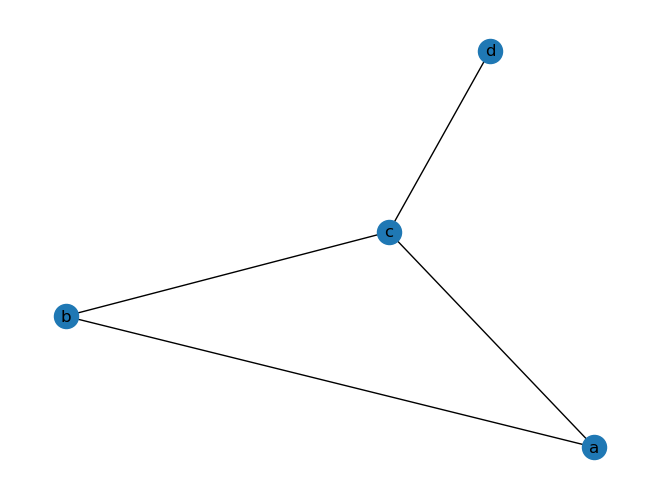

In [110]:
nx.draw(g, with_labels = True)
plt.show()

## Finding a Shortest PAth

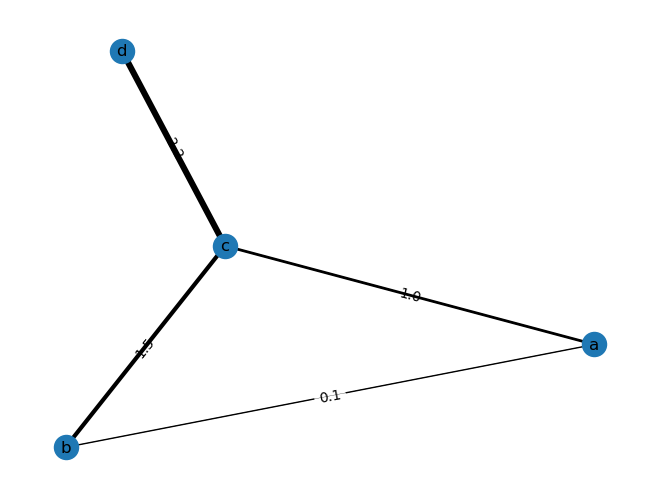

In [111]:
#Show the weights at each edge
#Make the edge width proportional to its weight
pos = nx.spring_layout(g)
weights = nx.get_edge_attributes(g, "weight")
nx.draw(g, pos, with_labels = True)

nx.draw_networkx_edge_labels(g, pos, edge_labels = weights)
nx.draw_networkx_edges(g, pos, width = [v * 2 for v in weights.values()])

plt.show()

In [112]:
print(nx.shortest_path(g, "b", "d"), nx.shortest_path_length(g, "b", "d"))
print(nx.shortest_path(g, "b", "d", weight = "weight"), nx.shortest_path_length(g, "b", "d", weight = "weight"))

['b', 'c', 'd'] 2
['b', 'a', 'c', 'd'] 3.3000000000000003


## Creating Directed Graphs

In [113]:
g = nx.DiGraph()
g.add_edge("a", "b", weight = 0.1)
g.add_edge("b", "c", weight = 1.5)
g.add_edge("a", "c", weight = 1.0)
g.add_edge("c", "d", weight = 2.2)

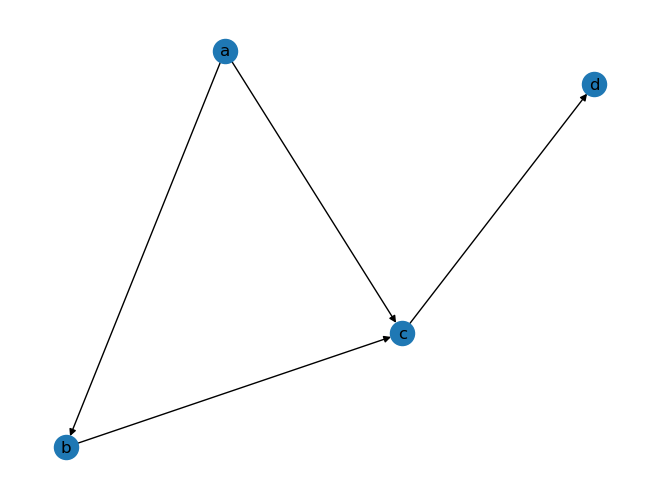

In [116]:
nx.draw(g, with_labels = True)
plt.show()

In [115]:
print(nx.shortest_path(g, "b", "d")) # ['b', 'c', 'd']
#print(nx.shortest_path(g, "d", "b")) # Error: No path between d and b.

['b', 'c', 'd']


## Example: Social Circles

In [117]:
facebook_graph = nx.read_edgelist("data/facebook_combined.txt")
print(len(facebook_graph.nodes)) # 4039
print(len(facebook_graph.edges)) # 88234

4039
88234


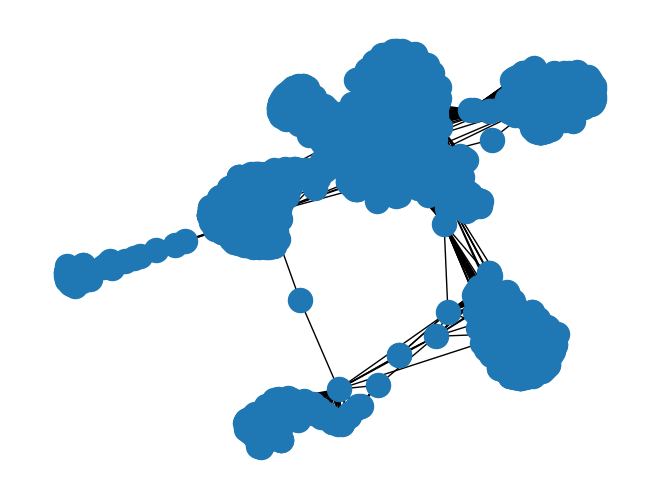

In [118]:
nx.draw(facebook_graph)

In [119]:
#Smaller graph
karate_graph = nx.karate_club_graph()
centrality = nx.betweenness_centrality(karate_graph)
# Returns a dictionary

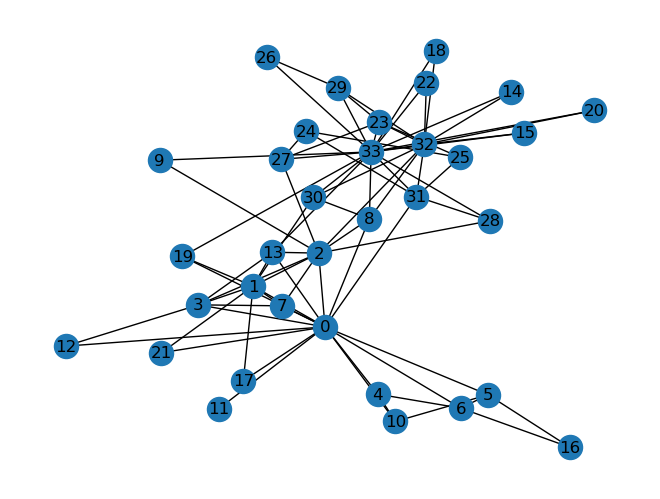

In [121]:
nx.draw(karate_graph, with_labels = True)

In [122]:
nx.betweenness_centrality(karate_graph) # оценка за всеки един Node колко е централен/важен

{0: 0.43763528138528146,
 1: 0.053936688311688304,
 2: 0.14365680615680618,
 3: 0.011909271284271283,
 4: 0.0006313131313131313,
 5: 0.02998737373737374,
 6: 0.029987373737373736,
 7: 0.0,
 8: 0.05592682780182781,
 9: 0.0008477633477633478,
 10: 0.0006313131313131313,
 11: 0.0,
 12: 0.0,
 13: 0.04586339586339586,
 14: 0.0,
 15: 0.0,
 16: 0.0,
 17: 0.0,
 18: 0.0,
 19: 0.03247504810004811,
 20: 0.0,
 21: 0.0,
 22: 0.0,
 23: 0.017613636363636363,
 24: 0.0022095959595959595,
 25: 0.0038404882154882154,
 26: 0.0,
 27: 0.02233345358345358,
 28: 0.0017947330447330447,
 29: 0.0029220779220779218,
 30: 0.014411976911976909,
 31: 0.13827561327561325,
 32: 0.145247113997114,
 33: 0.30407497594997596}

## Finding Communities

* Measure: cliques
    * Most commonly used algorithm: Girvan – Newman
        * Uses edge betweenness as the measure

level 1 ({0, 1, 3, 4, 5, 6, 7, 10, 11, 12, 13, 16, 17, 19, 21}, {2, 8, 9, 14, 15, 18, 20, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33})
level 2 ({0, 1, 3, 4, 5, 6, 7, 10, 11, 12, 13, 16, 17, 19, 21}, {32, 33, 2, 8, 14, 15, 18, 20, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31}, {9})
level 3 ({0, 1, 3, 7, 11, 12, 13, 17, 19, 21}, {32, 33, 2, 8, 14, 15, 18, 20, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31}, {4, 5, 6, 10, 16}, {9})


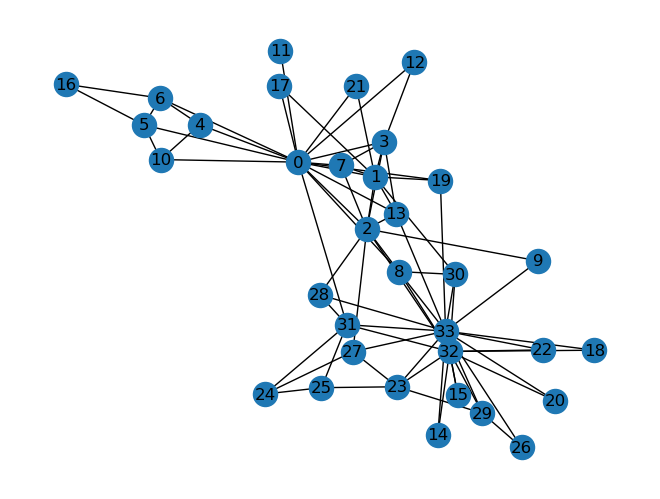

In [124]:
nx.draw(karate_graph, with_labels = True)
communities_generator = community.girvan_newman(karate_graph)
for i in range(1, 4):
    communities = next(communities_generator)
    print("level " + str(i), communities)